In [1]:
import pandas as pd
import numpy as np
from tqdm.auto import tqdm
import tensorflow as tf
from transformers import BertTokenizer

In [2]:
#reading dataset
df = pd.read_csv('Train.csv')  
#val_df = pd.read_excel('val.xlsx')
test_df = pd.read_csv('Val.csv')

In [3]:
train_df=df.sample(frac = 0.25)

print('size of training set: %s' % (len(train_df['Utterance'])))
print('size of validation set: %s' % (len(test_df ['Utterance'])))


train_df.head(10)

size of training set: 3775
size of validation set: 3100


,Utterance,Intent
3655,what is the number of points i earned with my ...,36
9935,does visa charge transaction fees in the uk,99
11773,the word is happiness; how many a's can you fi...,117
8125,could you tell me what my routing number from ...,81
2285,it might be either,22
12558,can you show me roundtrip flights from dallas ...,125
521,i need a newer insurance plan,5
10178,what scheduled meetings do i have today,101
13596,when should i expect my visa to expire,135
5440,give me the apr for my mastercard,54


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3775 entries, 3655 to 2742
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Utterance  3775 non-null   object
 1   Intent     3775 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 88.5+ KB


In [5]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3100 entries, 0 to 3099
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Utterance  3100 non-null   object
 1   Intent     3100 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 48.6+ KB


In [6]:
train_df['Intent'].value_counts()

145    44
28     38
52     37
9      37
103    36
       ..
67     18
149    18
24     16
49     16
19     15
Name: Intent, Length: 150, dtype: int64

In [7]:
test_df['Intent'].value_counts()

150    100
145     40
103     20
96      20
97      20
      ... 
50      20
51      20
52      20
53      20
75      20
Name: Intent, Length: 150, dtype: int64

### **Data Preparation**

In [8]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

In [9]:
train_df["Utterance"].iloc[0]

'what is the number of points i earned with my mastercard'

In [10]:
test_df["Utterance"].iloc[0]

'in spanish, meet me tomorrow is said how'

In [11]:
token = tokenizer.encode_plus(
    train_df['Utterance'].iloc[0], 
    max_length=256, 
    truncation=True, 
    padding='max_length', 
    add_special_tokens=True,
    return_tensors='tf'
)

In [12]:
token1 = tokenizer.encode_plus(
    test_df['Utterance'].iloc[0], 
    max_length=256, 
    truncation=True, 
    padding='max_length', 
    add_special_tokens=True,
    return_tensors='tf'
)

In [13]:
token.input_ids

<tf.Tensor: shape=(1, 256), dtype=int32, numpy=
array([[  101,  2054,  2003,  1996,  2193,  1997,  2685,  1045,  3687,
         2007,  2026,  3040, 11522,   102,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0, 

In [14]:
token1.input_ids

<tf.Tensor: shape=(1, 256), dtype=int32, numpy=
array([[ 101, 1999, 3009, 1010, 3113, 2033, 4826, 2003, 2056, 2129,  102,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,   

In [15]:
X_input_ids = np.zeros((len(train_df), 256))
X_attn_masks = np.zeros((len(train_df), 256))

In [16]:
X_input_ids1 = np.zeros((len(test_df), 256))
X_attn_masks1 = np.zeros((len(test_df), 256))

In [17]:
X_input_ids.shape

(3775, 256)

In [18]:
X_input_ids1.shape

(3100, 256)

In [19]:
def generate_training_data(df, ids, masks, tokenizer):
    for i, text in tqdm(enumerate(train_df['Utterance'])):
        tokenized_text = tokenizer.encode_plus(
            text,
            max_length=256, 
            truncation=True, 
            padding='max_length', 
            add_special_tokens=True,
            return_tensors='tf'
        )
        ids[i, :] = tokenized_text.input_ids
        masks[i, :] = tokenized_text.attention_mask
    return ids, masks

In [20]:
def generate_test_data(df, ids, masks, tokenizer):
    for i, text in tqdm(enumerate(test_df['Utterance'])):
        tokenized_text = tokenizer.encode_plus(
            text,
            max_length=256, 
            truncation=True, 
            padding='max_length', 
            add_special_tokens=True,
            return_tensors='tf'
        )
        ids[i, :] = tokenized_text.input_ids
        masks[i, :] = tokenized_text.attention_mask
    return ids, masks

In [21]:
X_input_ids, X_attn_masks = generate_training_data(df, X_input_ids, X_attn_masks, tokenizer)

0it [00:00, ?it/s]

In [22]:
X_input_ids1, X_attn_masks1 = generate_test_data(df, X_input_ids1, X_attn_masks1, tokenizer)

0it [00:00, ?it/s]

In [23]:
labels = np.zeros((len(train_df), 151))
labels.shape

(3775, 151)

In [24]:
labels1 = np.zeros((len(test_df), 151))
labels1.shape

(3100, 151)

In [25]:
labels[np.arange(len(train_df)), train_df['Intent'].values] = 1 # one-hot encoded target tensor

In [26]:
labels1[np.arange(len(test_df)), test_df['Intent'].values] = 1 # one-hot encoded target tensor

In [27]:
labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [28]:
labels1

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [29]:
# creating a data pipeline using tensorflow dataset utility, creates batches of data for easy loading...
dataset = tf.data.Dataset.from_tensor_slices((X_input_ids, X_attn_masks, labels))
dataset.take(1) # one sample data

<TakeDataset element_spec=(TensorSpec(shape=(256,), dtype=tf.float64, name=None), TensorSpec(shape=(256,), dtype=tf.float64, name=None), TensorSpec(shape=(151,), dtype=tf.float64, name=None))>

In [30]:
# creating a data pipeline using tensorflow dataset utility, creates batches of data for easy loading...
dataset1 = tf.data.Dataset.from_tensor_slices((X_input_ids1, X_attn_masks1, labels1))
dataset1.take(1) # one sample data

<TakeDataset element_spec=(TensorSpec(shape=(256,), dtype=tf.float64, name=None), TensorSpec(shape=(256,), dtype=tf.float64, name=None), TensorSpec(shape=(151,), dtype=tf.float64, name=None))>

In [31]:
def SentimentDatasetMapFunction(input_ids, attn_masks, labels):
    return {
        'input_ids': input_ids,
        'attention_mask': attn_masks
    }, labels

In [32]:
dataset = dataset.map(SentimentDatasetMapFunction) # converting to required format for tensorflow dataset 

In [33]:
dataset1 = dataset1.map(SentimentDatasetMapFunction) # converting to required format for tensorflow dataset 

In [34]:
dataset.take(1)

<TakeDataset element_spec=({'input_ids': TensorSpec(shape=(256,), dtype=tf.float64, name=None), 'attention_mask': TensorSpec(shape=(256,), dtype=tf.float64, name=None)}, TensorSpec(shape=(151,), dtype=tf.float64, name=None))>

In [35]:
dataset1.take(1)

<TakeDataset element_spec=({'input_ids': TensorSpec(shape=(256,), dtype=tf.float64, name=None), 'attention_mask': TensorSpec(shape=(256,), dtype=tf.float64, name=None)}, TensorSpec(shape=(151,), dtype=tf.float64, name=None))>

In [36]:
dataset = dataset.shuffle(10000).batch(16, drop_remainder=True) # batch size, drop any left out tensor

In [37]:
dataset.take(1)

<TakeDataset element_spec=({'input_ids': TensorSpec(shape=(16, 256), dtype=tf.float64, name=None), 'attention_mask': TensorSpec(shape=(16, 256), dtype=tf.float64, name=None)}, TensorSpec(shape=(16, 151), dtype=tf.float64, name=None))>

In [38]:
dataset1 = dataset1.shuffle(10000).batch(16, drop_remainder=True) # batch size, drop any left out tensor

In [39]:
dataset1.take(1)

<TakeDataset element_spec=({'input_ids': TensorSpec(shape=(16, 256), dtype=tf.float64, name=None), 'attention_mask': TensorSpec(shape=(16, 256), dtype=tf.float64, name=None)}, TensorSpec(shape=(16, 151), dtype=tf.float64, name=None))>

In [40]:
train_dataset = dataset
val_dataset = dataset1

### **Model**

In [41]:
from transformers import TFBertModel

In [42]:
model = TFBertModel.from_pretrained('bert-base-uncased') # bert base model with pretrained weights

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [43]:
# defining 2 input layers for input_ids and attn_masks
input_ids = tf.keras.layers.Input(shape=(256,), name='input_ids', dtype='int32')
attn_masks = tf.keras.layers.Input(shape=(256,), name='attention_mask', dtype='int32')

bert_embds = model.bert(input_ids, attention_mask=attn_masks)[1] # 0 -> activation layer (3D), 1 -> pooled output layer (2D)
intermediate_layer = tf.keras.layers.Dense(512, activation='relu', name='intermediate_layer')(bert_embds)
output_layer = tf.keras.layers.Dense(151, activation='softmax', name='output_layer')(intermediate_layer) # softmax -> calcs probs of classes

sentiment_model = tf.keras.Model(inputs=[input_ids, attn_masks], outputs=output_layer)
sentiment_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_ids (InputLayer)         [(None, 256)]        0           []                               
                                                                                                  
 attention_mask (InputLayer)    [(None, 256)]        0           []                               
                                                                                                  
 bert (TFBertMainLayer)         TFBaseModelOutputWi  109482240   ['input_ids[0][0]',              
                                thPooling(last_hidd               'attention_mask[0][0]']         
                                en_state=(None, 256                                               
                                , 768),                                                       

In [48]:
optim = tf.keras.optimizers.Adam(learning_rate=2e-5, decay=1e-6)
loss_func = tf.keras.losses.CategoricalCrossentropy()
acc = tf.keras.metrics.CategoricalAccuracy('accuracy')

In [49]:
sentiment_model.compile(loss=loss_func, metrics=[acc])

In [50]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

In [ ]:
hist = sentiment_model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=5,callbacks=[callback]
)

Epoch 1/5
235/235 [==============================] - 4949s 21s/step - loss: 5.1147 - accuracy: 0.0082 - val_loss: 5.0156 - val_accuracy: 0.0130
Epoch 2/5
235/235 [==============================] - 5628s 24s/step - loss: 5.0136 - accuracy: 0.0117 - val_loss: 5.0145 - val_accuracy: 0.0130
Epoch 3/5
235/235 [==============================] - 5578s 24s/step - loss: 5.0106 - accuracy: 0.0117 - val_loss: 5.0140 - val_accuracy: 0.0130
Epoch 4/5
 39/235 [===>..........................] - ETA: 55:20 - loss: 5.0078 - accuracy: 0.0064

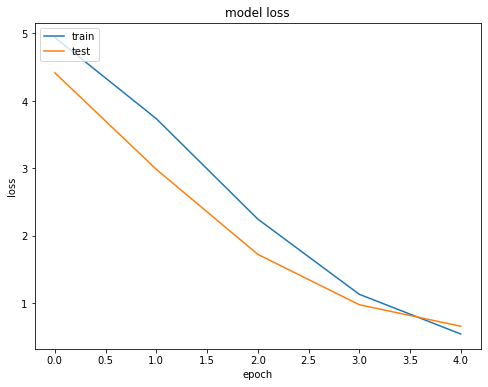

In [47]:
import matplotlib.pylab as plt
from matplotlib.pyplot import figure
figure(figsize=(8, 6))
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

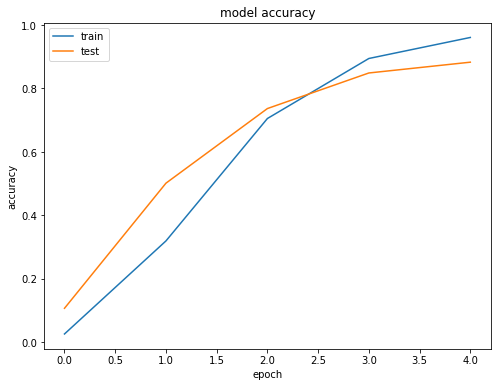

In [48]:
figure(figsize=(8, 6))
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [49]:
sentiment_model.save('sentiment_model')

INFO:tensorflow:Assets written to: sentiment_model\assets


INFO:tensorflow:Assets written to: sentiment_model\assets
